In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
#load the digits dataset 
digits = load_digits()

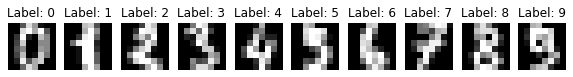

In [15]:
#set up plot with all the digits and their labels
fig, axes = plt.subplots(1, 10, figsize=(10, 5))

for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray') #display image
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
    
plt.show()

In [16]:
#features 
X = digits.data
y = digits.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
svm_classifier = SVC(kernel='rbf', gamma = 0.001, C=1.0)

In [19]:
#train
svm_classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [20]:
y_pred = svm_classifier.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier is: {accuracy}")

Accuracy of SVM classifier is: 0.9888888888888889


In [22]:
print('\nClassification Report: ')
print('\n')
print(classification_report(y_test, y_pred))


Classification Report: 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [23]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


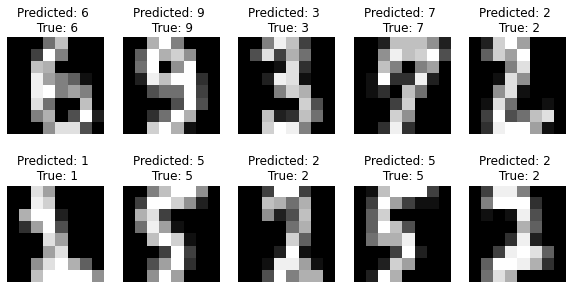

In [26]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape(8,8), cmap='gray')
    ax.set_title(f'Predicted: {y_pred[i]} \n True: {y_test[i]}')
    ax.axis('off')
    
plt.show()

Enter an index from (0 to 359): 200


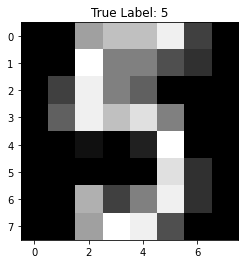

Predicted digit: 5


In [30]:
#take input from the user and return the image and the prediction from the model
index = int(input(f'Enter an index from (0 to {len(X_test) -1}): '))

image = X_test[index].reshape(8,8)
plt.imshow(image, cmap='gray')
plt.title(f'True Label: {y_test[index]}')
plt.show()
#this will print the image at that index

predicted_output = svm_classifier.predict([X_test[index]])
print(f'Predicted digit: {predicted_output[0]}')